In [3]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [5]:
import psycopg2
import pandas as pd
import sklearn
import re

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [6]:
# Paramètres de connexion à la base de données
host = "prod-rds-db.cbijryjiwdgw.eu-west-3.rds.amazonaws.com"
userName = "testdata"
password = "testData678341A"
dbName = "prodkbdb"
port = 5432

# Connexion à la base de données
try:
    conn = psycopg2.connect(
        host=host,
        user=userName,
        password=password,
        dbname=dbName,
        port=port
    )
    print("Connexion à la base de données réussie !")
except (Exception, psycopg2.Error) as error:
    print("Erreur lors de la connexion à la base de données:", error)
    exit()

# Requête SQL pour récupérer les données
query = "SELECT * FROM items" 

# Récupération des données dans un DataFrame pandas
df = pd.read_sql(query, conn)

# Fermeture de la connexion à la base de données
conn.close()

# Affichage du contenu sous forme de tableau
#display(df)

Connexion à la base de données réussie !


C:\Users\biraw\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
def remove_special_chars(text): #fonction de prétaitement de la colonne itemName, pour enlever les carctères parasites
    # Supprimer les emojis
    text = re.sub(r'[^\w\s\d]', '', text)
    # Supprimer les caractères spéciaux
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Appliquer la fonction remove_special_chars à la colonne 'itemName'
df['itemName'] = df['itemName'].apply(remove_special_chars)

display(df)

,id,amount,description,date,itemName,parent,quantity,taxAmount,taxDescription,type,storeId,createdAt,updatedAt,taxRate
0,dab26b1a-fdcf-42bf-b492-c4f9ce6fdd22,14.00,None,None,classe eco classe affaires ou first class je ...,None,None,1.27,TVA 10 %,menu,ef6ffed1-7a80-429f-a9ba-a9c2903417f4,2023-05-05 10:09:51.491000+00:00,2023-05-05 10:09:51.491000+00:00,1000
1,29e1b3c8-5815-4ce5-8c17-41ac118af3d2,5.43,None,None,yakitori beef cheese,None,None,0.28,TVA 5.5 %,None,ab162b25-e886-47e8-b8eb-db149fbcb48b,2023-04-30 12:37:26.690000+00:00,2023-04-30 12:37:26.690000+00:00,550
2,a15caa5f-c5db-4ed4-a7a7-d28d725170fa,0.00,None,None,je nai pas de pinto,None,None,0.00,TVA 10 %,None,ef6ffed1-7a80-429f-a9ba-a9c2903417f4,2023-05-05 10:09:51.497000+00:00,2023-05-05 10:09:51.497000+00:00,1000
3,22343608-5242-4915-aab4-b2c8c8359f98,2.00,.,None,supl b framboise,None,None,0.19,TVA 10 %,,4dbc86e9-6f9d-4047-bb8d-ba7b818ac585,2023-05-04 12:14:39.546000+00:00,2023-05-04 12:14:39.546000+00:00,1000
4,7a079257-992e-4740-8f22-1ae790ab20bd,7.18,None,None,green lipstick poulet plat,None,None,0.65,TVA 10 %,None,ef6ffed1-7a80-429f-a9ba-a9c2903417f4,2023-05-05 10:09:51.497000+00:00,2023-05-05 10:09:51.497000+00:00,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646380,8b750367-26c4-417b-b745-5558b827d13b,2.35,None,None,cocacola,None,None,0.12,TVA 5.5 %,None,f1d9ec52-f1d3-4661-9cb0-e02141da4a8c,2023-04-30 17:32:46.884000+00:00,2023-04-30 17:32:46.884000+00:00,550
3646381,69aadc83-8531-41d5-a238-c2869660066f,3.25,rch allume feu sans odeur 24cubes,None,rch allume feu sans odeur 24cubes,None,None,0.55,TVA 20 %,,8c089904-9b39-4fb8-9397-7961ad10271f,2023-05-04 15:35:49.179000+00:00,2023-05-04 15:35:49.179000+00:00,2000
3646382,a9a5e196-6f52-44b1-b3aa-fb5daac3a366,6.91,,None,finger griottine,None,None,0.63,TVA 10 %,,94f7c846-0e01-4ed2-9f8e-05f373287697,2023-05-04 15:35:50.305000+00:00,2023-05-04 15:35:50.305000+00:00,1000
3646383,aa3367fc-db20-4b01-9061-649b42c24846,3.10,,None,jus tomate pajot 75cl,None,None,0.17,TVA 5.5 %,,2ed75c20-5ccf-44fb-a0ea-da248ba0ffc9,2023-05-03 17:55:48.287000+00:00,2023-05-03 17:55:48.287000+00:00,550


In [8]:
# Extraction des caractéristiques textuelles
count_vect = CountVectorizer()
itemName_counts = count_vect.fit_transform(df['itemName'])

# Transformation en TF-IDF
tfidf_transformer = TfidfTransformer()
itemName_tfidf = tfidf_transformer.fit_transform(itemName_counts)
print(itemName_tfidf.shape)

(3646385, 38877)


C:\Users\biraw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


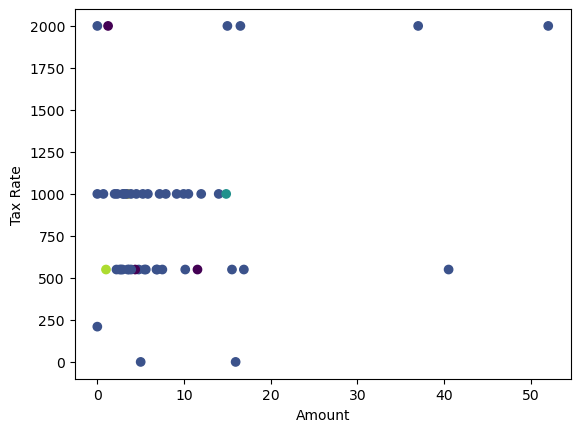

In [9]:
# Nombre de clusters (k)
k = 10

# Appliquer l'algorithme des k-moyennes
kmeans = KMeans(n_clusters=k)
kmeans.fit(itemName_tfidf)

# Obtenir les étiquettes des clusters
labels = kmeans.labels_

# On représente graphiquement que les 50 premiers éléments
plt.scatter(df['amount'][:50], df['taxRate'][:50], c=labels[:50])

plt.xlabel("Amount")
plt.ylabel("Tax Rate")
plt.show()


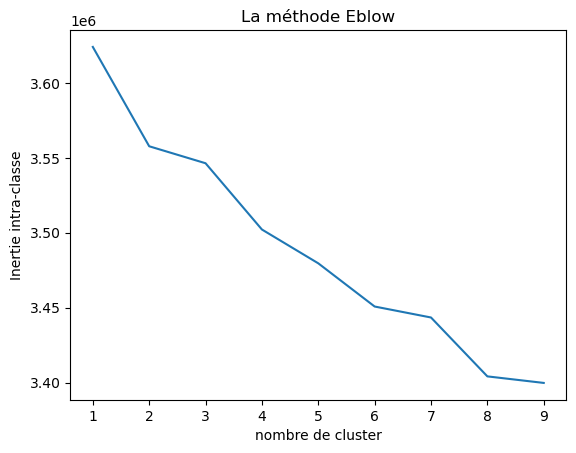

In [10]:
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(itemName_tfidf)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

In [1]:
def get_item_cluster(item):
    
    # Prétraitement de la valeur de 'itemName' de l'item
    preprocessed_item_name = remove_special_chars(item['itemName'])
    item_name_count = count_vect.transform([preprocessed_item_n
                                            1 ame])
    item_name_tfidf = tfidf_transformer.transform(item_name_count)

    # Prédiction du cluster pour l'item
    cluster_label = kmeans.predict(item_name_tfidf)

    return cluster_label[0]